# **Perceptron simple et multicouche avec Keras**

[Tensorflow](https://www.tensorflow.org/) = bibliothèque open-source développée par Google Brain qui implémente des méthodes d'apprentissage automatique basées sur le principe des réseaux de neurones profonds (deep learning). API Python est disponible donc exploitable directement mais moins "directe" que `Keras`.

[Keras](https://keras.io/) =  librairie  Python qui encapsule l'accès aux fonctions proposées par plusieurs librairies  de  machine  learning,  en  particulier  Tensorflow. Keras n'implémente donc pas les  méthodes mais sert d'interface

## **1. Classification binaire sur données simulées**

### **1.1 Génération des données**

1. Générer :
>- un vecteur aléatoire $X_1$ de 2000 observation à valeurs dans $[-0.5, 0.5]$
>- un vecteur aléatoire $X_2$ de 2000 observation à valeurs dans $[0, 1]$

In [1]:
import numpy as np
x1 = np.random.uniform(-0.5, 0.5, 2000)
x2 = np.random.uniform(0, 1, 2000)
x1, x2

(array([-0.45399486,  0.20711142,  0.30936134, ..., -0.24720549,
        -0.30932316,  0.2380448 ]),
 array([0.56502167, 0.90065673, 0.21036941, ..., 0.32220804, 0.08707333,
        0.78038259]))

2. Construire la variable label $Y$ de la manière suivante : $Y = 1$ si $0.1*X_2 > X_1²$ et 0 sinon

In [2]:
y = 1 * (x1**2 - 0.1 * x2 < 0)
y

array([0, 1, 0, ..., 0, 0, 1])

3. Regrouper les 2 variables prédictives $X_1$ $X_2$ et la variable expliquée $Y$ dans un dataframe puis représenter graphiquement les données

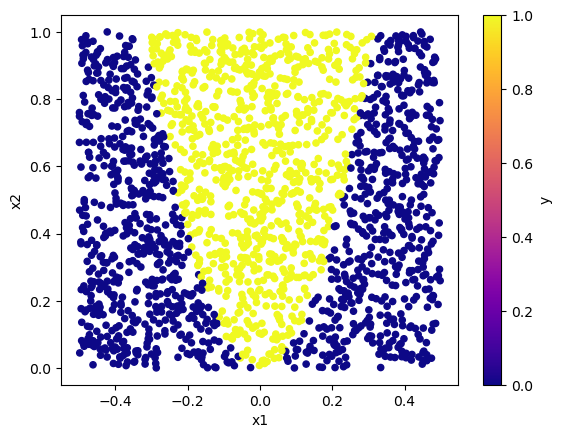

In [3]:
import pandas as pd
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
df.plot.scatter(x='x1', y='x2', c='y', cmap="plasma");

4. Découper les données en échantillons d'entraînement et test (avec 500 observations dans le testset)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y, test_size=500)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 2), (500, 2), (1500,), (500,))

5. Calculer la répartition des classes (c'est-à-dire la proportion de labels valant "1") dans les échantillons test et train.  
Est-elle équilibrée ?  
Si ce n'est pas le cas, quel paramètre utiliser lors du `train_test_split` pour y remédier ?

In [5]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.417, 0.416, 0.42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df.y, test_size=500, stratify=y)
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.417, 0.4166666666666667, 0.418)

### **1.2 Perceptron simple**

1. Importer les classes `Sequential` et `Dense` depuis la librairie adaptée. C'est quoi ce truc ?

In [7]:
from keras.models import Sequential
from keras.layers import Dense

2024-01-16 14:42:28.320888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2. Instancier le modèle `perceptron`

In [8]:
perceptron = Sequential()
type(perceptron)

2024-01-16 14:42:29.676963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


keras.engine.sequential.Sequential

3. Ajouter une couche pour spécifier un perceptron simple en spécifiant les bons paramètres (on prendra une fonction d'activation sigmoïde).

In [9]:
perceptron.add(Dense(units=1, input_dim=2, activation='sigmoid'))

4. Récupérer la configuration de votre modèle. À quoi correspond le paramètre `use_bias` ?

In [10]:
perceptron.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 2),
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [11]:
perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


5. Ci-dessous une répresentation visuelle de notre réseau. Quelles sont les valeurs (théoriques) en entrée et en sortie du neurone de la couche de sortie ? Que représente la valeur en sortie ?
   
<img src="images/perceptron_simple.png">

en entrée : $$a_0+a_1*x_1+a_2*x_2$$

en sortie : $$\sigma(a_0+a_1*x_1+a_2*x_2) = \frac{1}{1+e^{-(a_0+a_1*x_1+a_2*x_2)}}$$

6. Spécifier les paramètres d'apprentissage avec la méthode `compile`. On utilisera l'entropie croisée binaire comme fonction de perte, Adam comme algorithme d'optimisation et l'accuracy comme métrique.

In [12]:
perceptron.compile(optimizer='adam', metrics='accuracy', loss='binary_crossentropy')

7. Entraîner le réseau afin d'en estimer les paramètres. Fixer notamment les hyperparamètres `epochs` et `batch_size`. Que sont-ils ?

In [21]:
perceptron.fit(X_train, y_train, batch_size=32, epochs=25)

Epoch 1/25
47/47 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6107
Epoch 2/25
47/47 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6120
Epoch 3/25
47/47 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6187
Epoch 4/25
47/47 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6220
Epoch 5/25
47/47 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6253
Epoch 6/25
47/47 [==============================] - 0s 1ms/step - loss: 0.6524 - accuracy: 0.6253
Epoch 7/25
47/47 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6240
Epoch 8/25
47/47 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6267
Epoch 9/25
47/47 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6247
Epoch 10/25
47/47 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6273
Epoch 11/25
47/47 [

8. Récupérer les poids estimés et les replacer dans le réseau dessiné au dessus.

In [22]:
perceptron.get_weights()

[array([[0.12621245],
        [1.0425711 ]], dtype=float32),
 array([-0.8146899], dtype=float32)]

9. Calculer les prédictions sur le testset avec `predict`. Que sont ces valeurs ?

In [23]:
y_pred = perceptron.predict(X_test)
y_pred[:10]

16/16 [==============================] - 0s 1ms/step


array([[0.40307856],
       [0.31050685],
       [0.51633024],
       [0.5442129 ],
       [0.43437153],
       [0.34171498],
       [0.38306788],
       [0.33001086],
       [0.42509362],
       [0.4955218 ]], dtype=float32)

10. Récupérer à partir de ces valeurs prédites, la classe prédite

In [24]:
classes_pred = 1 * (y_pred > 0.5)
classes_pred[:10]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

11. Présenter au moins 2 mesures d'évaluation du modèle (adapté au problème traité bien sûr !) en utilisant des fonctions de `sklearn.metrics`

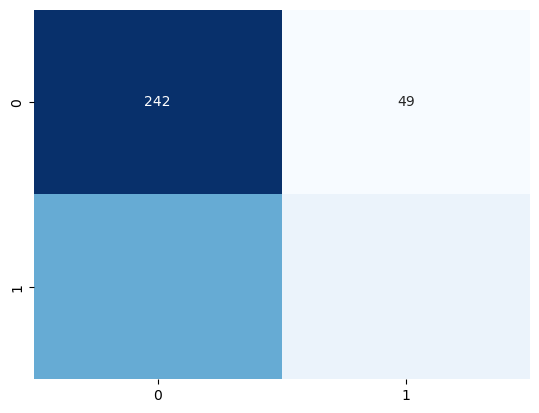

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, classes_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [26]:
accuracy_score(y_test, classes_pred)

0.606

In [28]:
print(classification_report(y_test, classes_pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       291
           1       0.55      0.29      0.38       209

    accuracy                           0.61       500
   macro avg       0.59      0.56      0.55       500
weighted avg       0.59      0.61      0.57       500



12. La même avec la méthode `evaluate`. Qu'est-ce que vous obtenez ?

In [29]:
perceptron.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6060


[0.6543540358543396, 0.6060000061988831]

### **1.3 Perceptron multicouche**

1. Reprendre toutes les étapes de la partie précédente pour construire et entraîner (partie 1.2, questions 1 à 7) un réseau à 3 couches de la forme suivante :

<img src="images/perceptron_multi.png">

2. Récupérer les poids et les replacer "à la main" dans le schéma du réseau de neurones

3. Et pour finir, on fait quoi ? Y a plus qu'à le faire alors.

## **2. Application à un problème multi-classes**

On va utiliser des données sur le vin disponibles sur le site UCI. Le but est de classifier 3 vignerons d'une même région à partir des caractéristiques des vins qu'ils produisent.

### **2.1 Les données**

1. Récupérer les données WINE [ici](https://archive.ics.uci.edu/ml/datasets/wine). Si vous voulez automatiser la récupération, c'est toujours un bon exo donc allez-y mais c'est pas l'objet du tp donc perdez pas trop de temps là-dessus. Les mettre dans un dataframe tout beau tout propre.

2. Quelques étapes usuelles avant d'aller plus loin : y a quoi dans le dataset, quelle est la variable d'intérêt, quelques stats descriptives, visualisations, etc...  

### **2.2 Preprocessing**

1. Keras  ne  sait  pas  manipuler  directement  une  variable multi-classe. Il faut la transformer en une série d’indicatrices. À vous de jouer (il y a une méthode `to_categorical` quelque part)

2. Découpage en échantillons train et test (avec 40 observations dans le test)

3. Les réseaux de neurones étant très dépendant des échelles des différentes variables, il faut standardiser les données avec un StandardScaler.  
Vérifier les moyennes et écart-types des variables après transformation. Qu'est-ce que vous devez avoir ?

### **2.3 Modélisation et évaluation**

1. Construire et entraîner un perceptron simple adapté au problème

2. Évaluer le modèle

3. Essayer d'améliorer votre modèle en ajoutant une couche cachée. Quel problème se pose lorsqu'on ajoute trop de couches ?